# CS5228 Assignment 2

For code completion tasks, please write down your answer (i.e., your lines of code) between sentences that "Your code starts here" and "Your code ends here". For answers in plain text, you can refer to [this Markdown guide](https://medium.com/analytics-vidhya/the-ultimate-markdown-guide-for-jupyter-notebook-d5e5abf728fd) to customize the layout (although it shouldn't be needed). For ease of checking your answers + grading, please keep your plain text answers in blue text.

When you work on this notebook, you can insert additional code cells (e.g., for testing) or markdown cells (e.g., to keep track of your thoughts). However, before the submission, please remove all those additional cells again. Thanks!

**Important:** 
* Remember to rename and save this Jupyter notebook as **A2_YourName_YourNUSNETID.ipynb** (e.g., **A2_BobSmith_e12345678.ipynb**) before submission!
* Remember to rename and save the script file **A2_script.py** as **A2_YourName_YourNUSNETID.py** (e.g., **A2_BobSmith_e12345678.py**) before submission!
* Submission deadline is Sunday April 2, 11.59 pm. You can submit it to Canvas under Assignments. You can use up to 4 out of your 8 late days, which extend the deadline by 24 hours each. 

Here is an overview over the tasks to be solved and the points associated with each task.

* **1 Decision Trees (16 Points)**
    * 1.1 Implementing a Decision Tree Regressor
        * 1.1 a) Calculating All Possible Thresholds (2 Points)
        * 1.1 b) Finding the Best Split (4 Points)
        * 1.1 c) Training the Decision Tree Regressor (4 Points)
    * 1.2 True/False Questions about Decision Trees (6 Points)
* **2 Tree Ensembles (12 Points)**
    * 2.1 Implementing a Random Forest Regressor
        * 2.1 a) Implementing Bagging (2 Points)
        * 2.1 b) Implementing Feature Sampling (2 Points)
        * 2.1 c) Training the Random Forest Regressor (2 Points)
        * 2.1 d) Predicting Output Values (2 Points)
    * 2.2 Questions about Tree Ensembles
        * 2.2 a) Random Forest: Bagging Only vs. Bagging + Feature Sampling (2 Points)
        * 2.2 b) Random Forest: Regression vs. Classification (2 Points)
* **3 Logistic Regression (8 Points)**
    * 3.1 True/False Questions about Logistic Regression (8 Points)
* **4 Model Selection (14 Points)**
    * 4.1 Data Preprocessing (3 Points)
    * 4.2 Performing K-Fold Cross-Validation "By Hand"
        * 4.2 a) Implement k-fold Cross Validation (4 Points)
        * 4.2 b) Run k-fold Cross Validation for 4 Regressors and Discuss the Results. (4 Points)
    * 4.3 Hyperparameter Tuning (3 Points)


## Setting up the Notebook

In [1]:
# Ensures that the notebook will reload external python modules;
# i.e. when you change something in your .py script, you do not need to re-import the .py script file.
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

Making all the required imports:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, f1_score
from sklearn import preprocessing

from src.utils import plot_validation_results, plot_scores

**Important:** This notebook also requires you to complete in a separate `.py` script file. This keeps this notebook cleaner and simplifies testing your implementations for us. As you need to rename the file `A2_script.py`, you also need to edit the import statement below accordingly.

In [3]:
# from A2_script import MyDecisionTreeRegressor, MyRandomForestRegressor # replace this line with the next line after renaming
from A2_NiharikaShrivastava_e0954756 import MyDecisionTreeRegressor, MyRandomForestRegressor # <-- you will need to rename this accordingly

----------

## 1 Decision Trees

Decision Trees are a very common classification and regression model on their own, but even more so as the core building block of ensemble models (Random Forests and Gradient Boosted Trees) which are among the most popular prediction models in many practical settings. As such, it is particularly important to gain a solid understanding of how they work, rather than treating them as a "black box", which we will do by implementing the core parts of these models.

### 1.1 Implementing a Decision Tree Regressor

In this section, you will implement your own Decision Tree regressor. To keep the complexity low, it is simplified as follows:

* Only numerical features are supported
* Only binary splits are supported

(incidentally, this is in line with scitkit-learn's [`DecisionTreeRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) implementation)

In the file `A2a_script.py`, you can find the skeleton code for the class `MyDecisionTreeRegressor`. Note that many parts of the implementation are given to you. Have a good look at the provided code to understand its different components.

**In the following subtasks, you will complete the methods where indicated by the comments within each method.** No need to worry, we will guide you through the implementation step by step.

#### Calculating the RSS Scores of a Node and a Split (nothing for you to do here!)

Recall from lecture that a criterion score is necessary in order to decide which split to make at a node. The criterion score can be interpreted as measuring the quality (or "purity") of the response variable within a node. In lecture, we introduced the use of the Gini index and entropy for measuring the purity of a node. 

In this assignment, we instead focus on regression trees, which are similar but slightly easier to implement. The quality measure used here is the *Residual Sum of Squares (RSS)*, or the sum of squared differences between the response variables of samples in a node, and the mean response variable in the node. Formally, the RSS score of a node is defined as:

$$RSS_{node} = \sum_{i\in R_{node}} (y_i - \mu_{R_{node}})^2$$

where $y_i$ is the response variable for sample $i$, $R_{node}$ is the set of sample indices at the node, and $\mu_{R_{node}}$ is the mean of the response variable for samples in $R_{node}$.

Analogously, the RSS score of a split is defined as summing the RSS score of the nodes resulting from the split:

$$RSS_{split} = \sum_{k=1}^K\sum_{i\in R_k} (y_i - \mu_{R_k})^2$$

where $K$ is the number of child nodes (here $K=2$ since all splits are binary splits), $R_k$ is the set of sample indices in child node $k$, and $\mu_{R_k}$ is the mean of the response values in $R_k$.

The intuition behind the RSS criterion is analogous to that of Gini index / entropy: the RSS at a node measures the amount of variation in a node, so if we find a split that achieves a low RSS, this means we have effectively separated the high values of the response variable from the low values of the response variable, which is a good split.

Since these are very basic arithmetic operations, we give you the two methods `calc_rss_score_node` and `calc_rss_score_split` for free. Have a look at both methods to convince yourself that these methods implement the formulas given above. Again, since we consider only binary splits, method `calc_rss_score_split` simplifies to calling `calc_rss_score_node` twice on both child nodes and summing up both scores.

#### 1.1 a) Calculating All Possible Thresholds (2 Points)

We have seen in the lecture that we can split numerical features using thresholds that separate the feature values into all values less or equal to a threshold and larger than the threshold.

**Implement the method `calc_thresholds()`!** In principle, there are different possible approaches. Here, we consider a simple approach, where we first sort the unique values of a feature, then the possible thresholds are the midpoints between every two adjacent values, as shown in the following example. You can test your implementation using the code cell below; it shows for three different inputs the expected outputs. (Hint: [`np.unique`](https://numpy.org/doc/stable/reference/generated/numpy.unique.html) might make life easier; note that it returns the values in sorted order.)

In [4]:
values1 = np.array([4, 1, 2, 1, 1, 3])
values2 = np.array([1, 2, 3, 4, 5, 6])
values3 = np.array([8, 0, 0, 1, 0, 0])
values4 = np.array([1, 1, 1])

my_regressor = MyDecisionTreeRegressor()

thresholds = my_regressor.calc_thresholds(values1)  # Expected output: [1.5 2.5 3.5]
print('Thresholds: {}'.format(thresholds))

thresholds = my_regressor.calc_thresholds(values2)  # Expected output: [1.5 2.5 3.5 4.5 5.5]
print('Thresholds: {}'.format(thresholds))

thresholds = my_regressor.calc_thresholds(values3)  # Expected output: [0.5 4.5]
print('Thresholds: {}'.format(thresholds))

thresholds = my_regressor.calc_thresholds(values4)  # Expected output: []
print('Thresholds: {}'.format(thresholds))

Thresholds: [1.5, 2.5, 3.5]
Thresholds: [1.5, 2.5, 3.5, 4.5, 5.5]
Thresholds: [0.5, 4.5]
Thresholds: []


#### Creating a Split (nothing for you to do here!)

We provide you the method `create_split()` to split a list `x` of feature values with respect to a threshold. Note that the method returns not the values themselves but the indices of the values. By giving you this method, we can ensure that everyone should get the exact same result, as well as that the results will match with the Decision Tree implementation of scikit-learn. For example, `create_split()` puts all samples `<=` then the threshold into the left child node (and all others into the right child node). However, there would be no principle difference to put them in the right child node (and all others into the left child node). It's purely a convention to ensure consistency. Again, have a good look at `create_split()` to understand its inputs, inner workings, and output.

#### 1.1 b) Finding the Best Split (4 Points)

Finding the best split is at the heart of training of a Decision Tree. As we saw in the lecture, the best split is defined by which

* feature *and*

* threshold

result in a split of the data samples yielding the best score (here: the split with the lowest RSS score). We already have the methods to calculate the RSS scores of a node and a split, as well as to calculate the thresholds to be considered for a given feature. Finding the best split essentially boils simply down to checking for each feature and all corresponding thresholds to check which split gets the lowest RSS score.

To test your implementation, let's first define a small toy dataset of 20 data samples. The two input features are the `weight` (in kg) and `height` (in cm) of a person, and the output value (i.e., the response variable) is the blood sugar level (in mmol/L).

In [5]:
weights = np.array([68, 71, 92, 59, 80, 81, 75, 88, 45, 64, 59, 87, 80, 73, 55, 92, 93, 72, 49, 57])
heights = np.array([175, 175, 170, 168, 184, 184, 167, 155, 152, 163, 190, 161, 160, 174, 159, 183, 165, 181, 179, 154])

X_toy = np.stack((weights, heights), axis=1)
y_toy = np.array([7.8, 7.7, 11.0, 7.9, 6.8, 7.9, 6.3, 9.5, 8.1, 9.0, 6.0, 10.1, 7.0, 7.8, 7.7, 10.2, 9.8, 7.0, 6.4, 7.6])

print('Toy dataset -- #samples: {}, #features: {}'.format(X_toy.shape[0], X_toy.shape[1]))

Toy dataset -- #samples: 20, #features: 2


**Implement method `calc_best_split`** to find the best split with respect to all features and corresponding thresholds. You obviously can and should make use of the existing methods you have implemented or are already provided to you. The skeleton code of method `calc_best_split()` shows you which values need to be returned. The 4 variables you need to return are those that:

* define a split (`best_feature_idx`, `best_threshold`)

* decide whether to split or not (`best_score`)

* recursively build the Decision Tree (`best_split`, which is a tuple containing the left and right child indices)

You can use the code cell below to test your implementation of the method. The following markdown cell shows the expected outcomes. As your implementation of the Decision Tree regressor does not contain any randomness, your results should match the expected outcome.

In [6]:
my_regressor = MyDecisionTreeRegressor()

score, threshold, feature_idx, split = my_regressor.calc_best_split(X_toy, y_toy)

In [7]:
print("Best feature index:   {} (0=weight, 1=height)".format(feature_idx))
print("Best threshold:       {} (for the best feature)".format(threshold))
print("#samples (left)       {}".format(len(split[0])))
print("#samples (right)      {}".format(len(split[1])))

Best feature index:   0 (0=weight, 1=height)
Best threshold:       84.0 (for the best feature)
#samples (left)       15
#samples (right)      5


The code cell above should yield the following output:
    
```
Best feature index:   0 (0=weight, 1=height)
Best threshold:       84.0 (for the best feature)
#samples (left)       15
#samples (right)      5
```

You can now also compare your implementation with scitkit-learn's [`DecisionTreeRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) implementation. Since we are only interested in the first split here -- that is, we are only interested in the root node and its two children -- we can set `max_depth=1`.

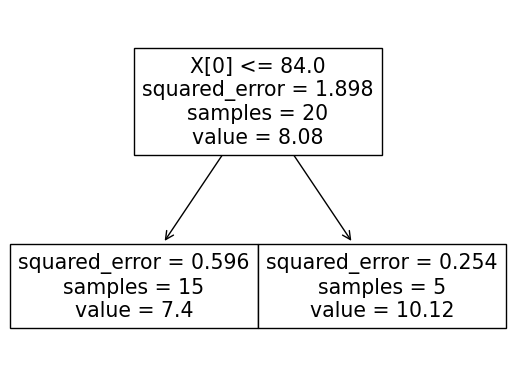

In [8]:
sk_regressor = DecisionTreeRegressor(max_depth=1).fit(X_toy, y_toy)

plt.figure()
tree.plot_tree(sk_regressor)
plt.show()

The information in the box for the root node reflects the feature index and threshold for the best split; the boxes for the two child nodes show you the number of samples in both children. Of course, all that information should match your results from above.

#### 1.1 c) Training the Decision Tree Regressor (4 Points)

With all the methods for scoring and splitting nodes in place, we can now train our Decision Tree. To this end, let's first load a small dataset. We use the [Hitters](https://www.kaggle.com/floser/hitters) dataset which aims to predict the salaries of baseball players based on their statistics. You can check the website for more details about the different features. In the following, we just consider a subset of all features to keep it simple.

In [9]:
subset = ['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Years', 'Assists', 'Errors']

df = pd.read_csv('data/a2-hitters.csv')
df = df.dropna(subset=subset+['Salary']) # We ignore all samples with NA values; it's not important here

X = df[subset].to_numpy()
y = df[['Salary']].to_numpy().squeeze()

# Note: sklearn.model_selection.train_test_split also shuffles the data!
# So we need to set random_state to ensure consistent results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print("Size of training set: {}".format(len(X_train)))
print("Size of test: {}".format(len(X_test)))

Size of training set: 210
Size of test: 53


Have a good look at methods `fit()` and `_fit()` and get a good understanding! They basically contain all the code required for recursively splitting nodes. So you don't have to worry about that. The only things missing from the `_fit()` method are the conditions for when to stop the recursion. Some conditions can be checked before calculating the best split, some afterwards (cf. lecture slides, including the ones to avoid overfitting).

**Implement the conditions to stop the recursion in method `_fit()` as indicated by `max_depth` and `min_samples_split`**! 

For example, if `max_depth`=1, this condition should stop the recursion even if we are in the top level node (which has `depth`=0). Similarly, we should stop the recursion if the current node has less than `min_samples_split` samples. The existing code has some stopping conditions already implemented; you can use them as examples.

Each condition can be implemented as a simple `if` statement that will `return` if true. (Note: The 2 parameters `max_depth` and `min_samples_split` are adopted from scikit-learn's [`DecisionTreeRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html); only exception: `min_samples_split` is only interpreted as *int*, scitkit-learn also has a separate interpretation if `min_sample_split` is a *float*)

In [10]:
print('Compare node counts for different values of max_depth')
for max_depth in [1, 3, 5]:
    my_regressor = MyDecisionTreeRegressor(max_depth=max_depth).fit(X_train, y_train)
    sk_regressor = DecisionTreeRegressor(max_depth=max_depth).fit(X_train, y_train)
    print('{} vs {}'.format(sk_regressor.tree_.node_count, my_regressor.get_node_count()))

print('\nCompare node counts for different values of min_samples_split')
for min_samples_split in [10, 20, 30]:
    my_regressor = MyDecisionTreeRegressor(min_samples_split=min_samples_split).fit(X_train, y_train)
    sk_regressor = DecisionTreeRegressor(min_samples_split=min_samples_split).fit(X_train, y_train)
    print('{} vs {}'.format(sk_regressor.tree_.node_count, my_regressor.get_node_count()))

Compare node counts for different values of max_depth
3 vs 3
13 vs 13
41 vs 41

Compare node counts for different values of min_samples_split
99 vs 99
41 vs 41
31 vs 31


Of course, the pairs of node counts should always match. (Hint: In case of (small) discrepancies, you first might want to check the stop conditions in the `_fit()` method. Simply a `<` instead of a `<=` can change the outcome. You can consult with the documentation of scikit-learn's [`DecisionTreeRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) to identify the correct conditions)

#### Predicting Output Values (nothing for you to do here!)

With the code for training the Decision Tree, the code for predicting output values is very straightforward. We therefore provide you with the methods `predict()` and `predict_sample()` with the former simply calling the latter for each given sample. The prediction of a single sample has to consider only two cases: (a) if the current node is not a leaf, we need to decide whether to recursively check the left or the right child node; (b) if the current node is a leaf, the predicted value is simply the mean of values in the node. Have a good look at `predict_sample()` to convince yourself that this method implements these two cases.

With the implementation of `MyDecisionTreeRegressor` complete, you can now compare your implementation with the one from scikit-learn in terms of the prediction values. The code cell below trains two Decision Trees, one using your implementation and the one from scikit-learn. Feel free to modify the values of `max_depth` and `min_samples_split`. For comparison, we print the predicted values of the first five samples in the test set `X_test` derived from both decision trees.

In [11]:
max_depth = 5
min_samples_split = 20

my_regressor = MyDecisionTreeRegressor(max_depth=max_depth, min_samples_split=min_samples_split).fit(X_train, y_train)
sk_regressor = DecisionTreeRegressor(max_depth=max_depth, min_samples_split=min_samples_split).fit(X_train, y_train)

# Let's compare the first 5 predicted values
print(my_regressor.predict(X_test)[:5])
print(sk_regressor.predict(X_test)[:5])

[244.75       725.92588889 244.75       725.92588889 207.46666667]
[244.75       725.92588889 244.75       725.92588889 207.46666667]


If you get identical predictions from both Decision Trees (and different values for `max_depth` and `min_samples_split`), your implementation should be correct.

### 1.2 True/False Questions about Decision Trees (6 Points)

This is a markdown cell. Please fill in your answers for (1)~(3).

| No. | Question                                                                                                   | Answer       | Brief Explanation |
|-----|------------------------------------------------------------------------------------------------------------|--------------| ------- |
| (1)  | The decision tree learning algorithm always finds an optimal decision tree, i.e., one that minimizes the number of questions needed to classify a case. | <font color='blue'> False </font> | <font color='blue'> There are cases where finding the optimal decision tree is computationally infeasible since the number of possible decision trees grows exponentially with the number of attributes and instances. Furthermore, the decision tree learning algorithm often relies on heuristics and approximations to reduce the search space, such as greedy algorithms that choose the best attribute to split at each node without considering the long-term consequences of this choice. This can lead to suboptimal trees that require more questions to classify a case than the optimal tree. </font> |
| (2)  | The performance of a Decision Tree classifier or regressors generally benefits from normalization/standardization of the input data. | <font color='blue'> False </font>| <font color='blue'> No, the algorithm performance is exactly the same if the entire input data is transformed. This applies to any order-preserving transformations: e.g. normalization, standardization, rescaling. </font> |
| (3)  | Small variations in the input data can yield very different Decision Trees.  | <font color='blue'> True </font>| <font color='blue'> Since Decision Trees formulation uses greedy heuristics such as finding the best split without considering the long-term consequences of this choice, variations in the input features can cause a different node to become the best split resulting in a completely different Decision tree. </font> |


---

## 2 Tree Ensembles

With the implementation of a Decision Tree regressor in place, the goal of this task now is to show that the extension to ensemble models  like Random Forests and Gradient Boosting Trees is rather straightforward one. In the following you will implement

* a Random Forest regressor *and*
* a Gradient Boosting Tree regressor

For both implementations you can directly adopt the algorithms covered in the lecture. Once you have completed this task, we hope that you see even more advanced models no longer as a complicated black box :).

### 2.1. Implementing a Random Forest Regressor

We saw that a Random Forest trains a whole set of Decision Trees in parallel. To yield different Decision Trees each time, two sampling strategies are performed:

* **Bootstrap Sampling:** randomly sample N data points with replacement (N = total number of data points); *and*

* **Feature Sampling:** randomly choose only a subset of features to be used for training and prediction.

#### 2.1 a) Implement Bagging (2 Points)
**Implement `bootstrap_sampling()` to generate a bootstrap sample for a given dataset!** 

The input is represented by feature array `X`, and target array `y` containing the output values. You can use the code cell below to test your implementation. The cell computes five bootstrap samples and prints the shapes of data matrix `X_bootstrap` and output values vector `y_bootstrap`, as well as the vector of the first five samples output values.


In [12]:
# We need to set the seed as the sampling is random, and we want to ensure consistent results
np.random.seed(0)

my_random_forest = MyRandomForestRegressor()

for _ in range(5):
    X_bootstrap, y_bootstrap = my_random_forest.bootstrap_sampling(X_toy, y_toy)
    print(X_bootstrap.shape, y_bootstrap.shape, y_bootstrap[:10])

(20, 2) (20,) [ 7.  10.2  7.8  7.9  7.9  9.5  9.   7.6  6.4  6.8]
(20, 2) (20,) [ 9.   7.6  9.8  7.6  7.9 10.2 10.2  7.8  6.4  7.9]
(20, 2) (20,) [ 6.   7.9 10.1  6.4 11.   7.8  7.8  6.8  7.9  6.3]
(20, 2) (20,) [ 7.9  6.3 10.1  7.7  6.4  7.8  7.7  7.9  7.   6. ]
(20, 2) (20,) [10.2  7.9 10.2  7.8  9.8  7.   7.9  9.   7.9  7.8]


The expected output is as follows:

```
(20, 2) (20,) [ 7.  10.2  7.8  7.9  7.9  9.5  9.   7.6  6.4  6.8]
(20, 2) (20,) [ 9.   7.6  9.8  7.6  7.9 10.2 10.2  7.8  6.4  7.9]
(20, 2) (20,) [ 6.   7.9 10.1  6.4 11.   7.8  7.8  6.8  7.9  6.3]
(20, 2) (20,) [ 7.9  6.3 10.1  7.7  6.4  7.8  7.7  7.9  7.   6. ]
(20, 2) (20,) [10.2  7.9 10.2  7.8  9.8  7.   7.9  9.   7.9  7.8]
```

Most importantly, the size of each bootstrap sample should reflect the size of the original dataset -- that is, each bootstrap sample needs to contain 20 data samples, each with two features for the toy dataset (weight and height).

#### 2.1 b) Implement Feature Sampling (2 Points)
**Implement method `feature_sampling()`!** 
The input is a feature array `X`; to specify the number of features we use a simple approach where `max_features` specifies the ratio of features to be considered. Apart from the new dataset `X_sample` the method also returns the indices of the selected features; you will need this information when implementing the `fit()` method for training the Random Forest.

Have a look at the `__init__()` method; note that `MyRandomForestRegressor` already supports the `max_features` parameter which is aligned with the [`RandomForestRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) from scikit-learn. For the implementation of `feature_sampling()`, however, we keep it simple, and consider `max_features` as a *float* which value between 0 and 1, reflecting the ratio of features to include in the sample. For example, if `max_features=0.4`, only 40% of all features are part of the sample. If this number is not an integer, please always round up (Hint: [`np.ceil`](https://numpy.org/doc/stable/reference/generated/numpy.ceil.html)).

You can use the code cell below to test your implementation. Since the toy dataset has only 2 features, feature sampling with `max_features=0.5` and lower will return only one feature.


In [30]:
# We need to set the seed as the sampling is random, and we want to ensure consistent results
np.random.seed(0)

my_random_forest = MyRandomForestRegressor(max_features=0.5)

for _ in range(5):
    X_sample, indices_sampled = my_random_forest.feature_sampling(X_toy)
    print(X_sample.shape, indices_sampled)

(20, 1) [1]
(20, 1) [0]
(20, 1) [0]
(20, 1) [1]
(20, 1) [0]


The expected output is as follows:

```
(20, 1) [1]
(20, 1) [0]
(20, 1) [0]
(20, 1) [1]
(20, 1) [0]
```

Since we round up, the result will also be the same for, say `max_features=0.00001`. If you set `max_fetures` to a value larger than 0.5, all two features will be selected and each line in the output should be `(20, 2) [0 1]` or `(20, 2) [1 0]`. Values for `max_features` less or equal to `0`  or larger than `1.0` are of course invalid. But you do not need to make any checks in your implementation!

#### 2.1 c) Training the Random Forest (2 Points)

With **Bootstrap Sampling (Bagging)** and **Feature Sampling** -- and of course the implementation of your Decision Tree regressor -- everything is in place to finally train the Random Forest. As we saw in the lecture, training a Random Forest is simply training multiple Decision Trees based on different sampled datasets.

**Implement method `fit()` to train the Random Forest!** Have a good look at the given code snippet, and note that you need to keep track of the tuple `(regressor, indices_sampled)` for each estimator (i.e., Decision Tree). You will need `indices_sampled` later when making predictions, as you can only predict using those features that were also used during the training of a particular regressor.

You can use the code cell below to test your implementation.


In [14]:
# We need to set the seed as the sampling is random, and we want to ensure consistent results
np.random.seed(1)

my_random_forest = MyRandomForestRegressor(n_estimators=100, max_features=0.5).fit(X_toy, y_toy)

for i in range(5):
    print(my_random_forest.estimators[i][0].predict(np.array([[73, 180], [90, 170]])), my_random_forest.estimators[i][1])

[8.1 8.1] [1]
[7.8 9.5] [0]
[7.8 9.5] [0]
[8.1 8.1] [1]
[7.8 9.5] [0]


The expected output is as follows:

```
[8.1 8.1] [1]
[7.8 9.5] [0]
[7.8 9.5] [0]
[8.1 8.1] [1]
[7.8 9.5] [0]
```

#### 2.1 d) Predicting the Output Values (2 Points)

With a trained Random Forest, all that's left is to predict the output values for new data points. We do this by using each estimator (i.e., Decision Tree) to predict the value, and then calculate the average over predictions. Again, since we can only use those features with which an individual Decision Tree was trained on, you need information about `indices_sampled` here (cf. `fit()` method).

**Implement method `predict()` to predict the output values for new data points! (2 Points)** The input is represented by a feature array `X` containing all new data points. If `X` contains N data points, the result should be an array containing all N predictions.

You can use the code cell below to test your implementation.


In [15]:
# We need to set the seed as the sampling is random, and we want to ensure consistent results
np.random.seed(1)

my_random_forest = MyRandomForestRegressor(n_estimators=100, max_features=1.0).fit(X_toy, y_toy)

print(my_random_forest.predict(np.array([[73, 180], [90, 170]])))

[ 6.995 10.435]


The expected output is as follows:

```
[ 6.995 10.435]
```

#### Additional Tests (nothing for you to do here!)

You have now implemented your Random Forest regressor. This means that you can now also compare your implementation with the one from scikit-learn. Due to the random sampling, it is basically not possible to ensure the same results. Although we set `np.random.seed()`, your implementation and the one from scikit-learn are too different for that to matter. To lower the effect of randomization we can "switch off" feature sampling by always using all features (`max_features=1.0`).

Try different values for `n_estimators`. You should see that the more estimators you use the more similar the results. This shouldn't be surprising as we make the predictions as this tends to stabilize the results. Just don't go too high as your implementation is far from optimized :).


In [16]:
%%time

# We need to set the seed as the sampling is random, and we want to ensure consistent results
np.random.seed(1)

n_estimators = 100

my_random_forest = MyRandomForestRegressor(n_estimators=n_estimators, max_features=1.0).fit(X_train, y_train)
sk_random_forest = RandomForestRegressor(n_estimators=n_estimators, max_features=1.0).fit(X_train, y_train)

print(my_random_forest.predict(X_test)[:5])
print(sk_random_forest.predict(X_test)[:5])
print()

[312.67143 560.75831 285.995   550.56497 343.265  ]
[292.24643 560.37498 299.13    550.5833  309.775  ]

CPU times: user 22.1 s, sys: 196 ms, total: 22.3 s
Wall time: 22.3 s


For `n_estimators = 100`, it should take about 30s to run, and the expected output is as follows:

```
[312.67143 560.75831 285.995   550.56497 343.265  ]
[292.24643 560.37498 299.13    550.5833  309.775  ]
```

### 2.2 Questions about Tree Ensembles

#### 2.2 a) Random Forest: Bagging Only vs. Bagging + Feature Sampling (2 Points)

The code cell below trains a two series of 20 Decision Trees each. One series uses only Bagging (i.e., Bootstrap Sampling) for the training data; the other series uses both Bagging and Feature Sampling. The output shows the results for "Bagging only" in the left column and "Bagging + Feature Sampling" in the right column. `root index` represents the feature index chosen as the root node (i.e., for the first split); `#nodes` represents the total number of nodes in the trained Decision Tree.

**Note:** There is nothing for you to implement here, but feel free to increase the number of Decision Trees beyond 20.

In [17]:
# We need to set the seed as the sampling is random, and we want to ensure consistent results
np.random.seed(10)

my_random_forest_bagging = MyRandomForestRegressor(max_features=1.0)
my_random_forest_sampling = MyRandomForestRegressor(max_features=0.2)

print("Bagging only\t\t\t\tBagging + Feature Sampling")
for _ in range(20):
    # Create a new bootstrap sample
    X_t, y_t = my_random_forest_bagging.bootstrap_sampling(X_train, y_train)
    regressor_bagging = DecisionTreeRegressor().fit(X_t, y_t)
    
    X_t, indices_sampled = my_random_forest_sampling.feature_sampling(X_t)
    regressor_sampling = DecisionTreeRegressor().fit(X_t, y_t)    
    
    # Print core features of trained Decision Tree
    # (feature index of root node, total of number of nodes in Decision Tree)
    print('#root index: {},  #nodes: {}\t\t#root index: {},  #nodes: {}'
          .format(regressor_bagging.tree_.feature[0], regressor_bagging.tree_.node_count,
                  indices_sampled[regressor_sampling.tree_.feature[0]], regressor_sampling.tree_.node_count))

Bagging only				Bagging + Feature Sampling
#root index: 1,  #nodes: 259		#root index: 1,  #nodes: 263
#root index: 4,  #nodes: 253		#root index: 0,  #nodes: 263
#root index: 1,  #nodes: 245		#root index: 2,  #nodes: 231
#root index: 5,  #nodes: 251		#root index: 2,  #nodes: 239
#root index: 1,  #nodes: 247		#root index: 5,  #nodes: 231
#root index: 4,  #nodes: 243		#root index: 1,  #nodes: 257
#root index: 5,  #nodes: 241		#root index: 1,  #nodes: 249
#root index: 0,  #nodes: 249		#root index: 5,  #nodes: 249
#root index: 1,  #nodes: 259		#root index: 1,  #nodes: 269
#root index: 5,  #nodes: 231		#root index: 0,  #nodes: 243
#root index: 5,  #nodes: 273		#root index: 5,  #nodes: 235
#root index: 5,  #nodes: 255		#root index: 5,  #nodes: 249
#root index: 1,  #nodes: 231		#root index: 2,  #nodes: 237
#root index: 1,  #nodes: 263		#root index: 1,  #nodes: 271
#root index: 5,  #nodes: 253		#root index: 5,  #nodes: 259
#root index: 1,  #nodes: 261		#root index: 1,  #nodes: 279
#root index: 

**Interpret the result!** Comparing the resulting series of Decision Trees when using **Bagging only** and **Bagging + Feature Sampling**, what differences do you observe in the root indices chosen between the left and right cases? Please explain your observations. (You do not need to comment on the #nodes for now)

(It might be useful to remember that the size of `X_train` is 210 data samples with 8 features; note also that each [`sklearn.tree.DecisionTreeRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) has been trained with their default parameters)

**Your Answer:**

<font color="blue">
    
1. In Bagging (B), all 8 features are used to compute the root index. In Bagging + Feature Sampling (BF), 2 features are used to compute the root index.
    
2. 9/20 (45%) individual trees selected the same root index irrespective of the methods, using the same boostratpped data.

```
#root index: 1,  #nodes: 259		#root index: 1,  #nodes: 263
#root index: 1,  #nodes: 259		#root index: 1,  #nodes: 269
#root index: 5,  #nodes: 273		#root index: 5,  #nodes: 235
#root index: 5,  #nodes: 255		#root index: 5,  #nodes: 249
#root index: 1,  #nodes: 263		#root index: 1,  #nodes: 271
#root index: 5,  #nodes: 253		#root index: 5,  #nodes: 259
#root index: 1,  #nodes: 261		#root index: 1,  #nodes: 279
#root index: 5,  #nodes: 255		#root index: 5,  #nodes: 247
#root index: 5,  #nodes: 259		#root index: 5,  #nodes: 255
```
    
3. Therefore, this means that (BF) arrived at the same decision as (B) with lesser computation for the best split (80% less computation).
    
4. Moreover, (B) selects root index mainly from `{0, 1, 4, 5}` after comparing all eight features. This means that these might be the Top-4 best splits in most cases. However, (BF) selects the root index from `{0, 1, 2, 4, 5}` after random sampling and comparison between resulting two features. The only difference is the addition of feature `2` in BF. This shows that BF is able to deduce the Top-4 best splits as well with extremely less computation, along with avoiding overfitting the data.
        
</font>    

#### 2.2 b) Random Forest: Regression vs. Classification (2 Points)

The markdown cell below shows a screenshot showing similar results as you have seen in 2.2 a). The only difference here is that these results stem from a classification task (and not a regression task). More specifically, the simple [IRIS](https://archive.ics.uci.edu/ml/datasets/iris) dataset was: it's small and clean, and has only numerical features. The dataset contains 3 classes of 50 instances each, where each class refers to a type of iris plant described by 4 features. This means that each Decision Tree has been trained with 150 data samples.

<img src="data/a2-rf-regression-vs-classification.png" width="500">

**Interpret the result!** Again, state and explain the differences between the left and right cases, both in the root index and #nodes. Particularly, compare these results with the results from the regression task in 2.3 a). Explain why the number of nodes now varies greatly between the left and right cases, while it hardly varied for the earlier case (regression).

(As in 2.2 a) each [`sklearn.tree.DecisionTreeClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) has been trained with their default parameters)


**Your Answer:**

<font color="blue">
    
1. Main root indexes are `{2, 3}`. However, when `0` is chosen due to feature sampling, the #nodes is extremely high since its a bad split choice (not a clean split compared to just Bagging). Therefore, it takes larger number of nodes to recover from this bad splitting decision and arrive at a clean split in the end.

2. There is also lesser number of features(4) as compared to the regression task above (8). Therefore, since the classification task doesn't have as many features and less data, Bagging provides clean splits in less number of nodes and less computation. However, it is possible that it may have overfit to this small dataset.

3. Moreover, in classification tasks, the leaf nodes are absolute values (classes). However, in a regression task, the leaf nodes are determined by ranges or thresholds set by us using heuristics (max_depth, min_no_samples, value ranges). This inherently doesn't always result in cleaner splits compared to classification tasks. Hence, Bagging + feature sampling performs equivalent to just Bagging in regression since the number of possibilities are high.
        
</font>    

---

## 3 Logistic Regression

### 3.1 Questions about Logistic Regression (8 Points)

In the table below are 4 statements that are either True or False. Complete the table to specify whether a statement is True or False, and provide a brief explanation for your answer (Your explanation is more important than a simple True/False answer)


This is a markdown cell. Please fill in your answers for (1)~(4).

| No. | Statement                                                                                                   | True or False?       | Brief Explanation |
|-----|------------------------------------------------------------------------------------------------------------|--------------| ------- |
| (1)  | If the dataset is linearly separable, logistic regression will eventually achieve a loss of 0 | <font color = 'blue'> True </font>| <font color = 'blue'> The minimization of the loss function (J) of logistic regression for a linearly separable dataset is a convex optimization problem (J has convexity), where the solution will always reach the global minima provided the learning rate is chosen appropriately, i.e., loss of 0. </font> |
| (2)  | No matter how the parameter vector $\theta$ is initialized, logistic regression will eventually always converge to the same solution (for the same dataset), if we train it to convergence | <font color = 'blue'> True </font> | <font color = 'blue'> Since the loss function (J) of logistic regression has convexity, it will always reach the global minima eventually, i.e., it will always have the same solution no matter what it's initialization is. However, the time taken to reach the global minima might be different. </font> |
| (3)  | Since logistic regression considers the interaction between features, it always performs better then a (single) Decision Tree |<font color = 'blue'> False </font> | <font color = 'blue'> Logistic regression models the interaction between features by using non-linear transformations of the input variables. However, it assumes a linear relationship between the transformed input variables and the target variable. In contrast, decision trees can model non-linear relationships between the input variables and the target variable by recursively partitioning the input space based on the input features. Therefore, it is not always true that logistic regression performs better than a single decision tree. The performance of each algorithm depends on the nature of the problem and the characteristics of the data. For example, logistic regression may be better suited for problems where the relationship between the input variables and the target variable is approximately linear, while decision trees may be better suited for problems where the relationship is non-linear and can be captured by a series of simple rules. </font> |
| (4)  | When incorporating Regularization into logistic regression, you would generally see larger training loss | <font color = 'blue'> True </font> |  <font color = 'blue'> Generalization avoids overfitting to the training dataset by penalizing the loss function at each iteration. Therefore, the training loss is generally larger. </font>|


---

## 4 Model Selection

The topic "Classification & Regression" covered a whole series of different models. In this section, we look at the basic data mining task of finding the best model for a given dataset: which model performs best with which hyperparameters. To keep it simple and keep the implementation work to a minimum, we make full use of scikit-learn (see additional hints in the subtasks).

#### Prepare Dataset

#### Load Dataset from File

We use a [WHO Life Expectancy](https://www.kaggle.com/kumarajarshi/life-expectancy-who) dataset for this task. Note that we cleaned the dataset for you (i.e., there are no dirty records in there).

Let's load the file and have a look at it.

In [18]:
df = pd.read_csv('data/a2-life-expectancy-cleaned.csv')

df.head()

,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life expectancy
0,2015,Developing,263.0,62,0.01,71.279624,65.0,1154,19.1,83,...,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,65.0
1,2014,Developing,271.0,64,0.01,73.523582,62.0,492,18.6,86,...,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,59.9
2,2013,Developing,268.0,66,0.01,73.219243,64.0,430,18.1,89,...,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,59.9
3,2012,Developing,272.0,69,0.01,78.184215,67.0,2787,17.6,93,...,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,59.5
4,2011,Developing,275.0,71,0.01,7.097109,68.0,3013,17.2,97,...,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,59.2


For your convenience, we split the dataframe into two, one containing the input features, the other containing the class labels.

In [19]:
df_X = df.iloc[:,0:-1]
df_y = df.iloc[:,-1]

### 4.1 Data Preprocessing (3 Points)

As usual, the first step is data preprocessing (informed by an EDA). As mentioned, above there's not much to do as this dataset does not contain any "dirty" records, particularly, there are no NA values in any of the columns/features. As such, there should be no need to remove any samples.

**Preprocess the data:** Note that we have already imported [`sklearn.preprocessing`](https://scikit-learn.org/stable/modules/preprocessing.html). You should convert the categorical feature (`Status`) to a binary feature, and also scale the data with correct usage of `StandardScaler`. Note that we have provided **two code blocks**; for each of the operations you need to do, you should choose appropriately as to whether your operations should be done in the former or latter blocks (recalling discussion in lecture on avoiding leakage).

In [20]:
#########################################################################################
### Your code starts here ############################################################### 
labelencoder= preprocessing.LabelEncoder()
df_X['Status'] = labelencoder.fit_transform(df_X['Status'])
### Your code ends here #################################################################
#########################################################################################

In [21]:
# Convert dataframes to numpy arrays
X, y = df_X.to_numpy(), df_y.to_numpy()

# Split dataset in training and test data (20% test data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [22]:
#########################################################################################
### Your code starts here ###############################################################
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
### Your code ends here #################################################################
#########################################################################################

In [23]:
print(X_train.shape)

(1319, 20)


#### Training and Evaluating off-the-shelf Models

Packages like `scikit-learn` make it almost trivial to train a variety of models with a minimum number of lines of codes. In the following code cell, we train 6 different models with their default values using the training data, and evaluate them over the test set. We use the Root Mean Squared Error (RMSE) score as the evaluation metric.

In [24]:
print('RMSE scores for test data for all regressors')
print('===========================================')
for model in [KNeighborsRegressor(), LinearRegression(), DecisionTreeRegressor(),
              AdaBoostRegressor(), RandomForestRegressor(), GradientBoostingRegressor()]:    
    try:
        regressor = model.fit(X_train, y_train)
        # Predict values for test samples
        y_pred = model.predict(X_test)
        # Calculate the RMSE
        rmse = mean_squared_error(y_test, y_pred, squared=False)
    except Exception as e:
        print(e)
        # Handle exception (e.g., a regressor is still None)
        rmse = '---'
    # Print regressor name and the RMSE score
    print('{}:\t{:.3}'.format(type(regressor).__name__, rmse))

RMSE scores for test data for all regressors
KNeighborsRegressor:	3.05
LinearRegression:	3.53
DecisionTreeRegressor:	2.69
AdaBoostRegressor:	3.06
RandomForestRegressor:	1.81
GradientBoostingRegressor:	2.09


### 4.2 Performing K-Fold Cross-Validation "By Hand"

The code below shows the basic loop for an evaluation using k-fold cross-validation. The only bits missing are the steps to (a) create the k folds and (b) to construct the training set of (k-1) folds and the validation set of 1 fold. For this task, use the `DecisionTreeRegressor` by default as it is the fastest to evaluate. 

#### 4.2 a) Implement k-fold Cross Validation (4 Points)
For testing and debugging, feel free to reduce `num_folds` (e.g., 5) and `param_choices` (e.g., `[1, 2, 3]`) in the beginning, as shown in the comments.

(Hint: Have a look at [`np.array_split`](https://numpy.org/doc/stable/reference/generated/numpy.array_split.html))

In [25]:
%%time

num_folds = 5
param_choices = [1, 2, 3, 5]

X_train_folds = []
y_train_folds = []

#########################################################################################
### Your code starts here ###############################################################

# Hint: you can use np.array_split to split the sample indices into folds here
X_train_folds = np.array_split(X_train, num_folds)
y_train_folds = np.array_split(y_train, num_folds)
### Your code ends here #################################################################
#########################################################################################

param_to_scores = {}

for param in param_choices:
    
    ## We want to keep track of the training scores and validation scores
    rmse_train, rmse_valid = [], []
    
    for i in range(num_folds):
        X_train_fold, X_valid_fold = None, None
        y_train_fold, y_valid_fold = None, None

        #########################################################################################
        ### Your code starts here ###############################################################
        
        # Hint: consider the np.setdiff1d function to construct the training folds here (optional; 
        # other ways are fine too)
        X_valid_fold = X_train_folds[i]
        y_valid_fold = y_train_folds[i]
        
        X_train_fold = np.concatenate(np.delete(X_train_folds, i))
        y_train_fold = np.concatenate(np.delete(y_train_folds, i))
        ### Your code ends here #################################################################
        #########################################################################################           

        
        ## Train all the regressors one-by-one and discuss the results
        regressor = KNeighborsRegressor(n_neighbors=param).fit(X_train_fold, y_train_fold)
#         regressor = DecisionTreeRegressor(max_depth=param).fit(X_train_fold, y_train_fold)
        #regressor = RandomForestRegressor(max_depth=param).fit(X_train_fold, y_train_fold)
        #regressor = GradientBoostingRegressor(max_depth=param).fit(X_train_fold, y_train_fold)

        
        ## Predict labels for for training validation set
        y_pred_fold_train = regressor.predict(X_train_fold)
        y_pred_fold_valid = regressor.predict(X_valid_fold)
      
        ## Keep track of training and validation scores
        rmse_train.append(mean_squared_error(y_train_fold, y_pred_fold_train, squared=False))
        rmse_valid.append(mean_squared_error(y_valid_fold, y_pred_fold_valid, squared=False))
        
    ## Keep track of all num_folds scores for current param (for plotting)
    param_to_scores[param] = (rmse_train, rmse_valid)
    
    ## Print statement for some immediate feedback
    print('param = {}, RMSE (training) = {:.3f}, RMSE (validation) = {:.3f} (stdev: {:.3f})'.format(param, np.mean(rmse_train), np.mean(rmse_valid), np.std(rmse_valid)))
    

param = 1, RMSE (training) = 0.000, RMSE (validation) = 3.101 (stdev: 0.240)


/Users/niharika/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)
/Users/niharika/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)
/Users/niharika/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengt

param = 2, RMSE (training) = 1.581, RMSE (validation) = 2.941 (stdev: 0.211)
param = 3, RMSE (training) = 1.998, RMSE (validation) = 2.982 (stdev: 0.107)


/Users/niharika/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)
/Users/niharika/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)
/Users/niharika/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengt

param = 5, RMSE (training) = 2.463, RMSE (validation) = 3.112 (stdev: 0.091)
CPU times: user 2.32 s, sys: 627 ms, total: 2.95 s
Wall time: 424 ms


If correct, your answers (for the debug case) should look like this:
```
param = 1, RMSE (training) = 0.000, RMSE (validation) = 3.101 (stdev: 0.240)
param = 2, RMSE (training) = 1.581, RMSE (validation) = 2.941 (stdev: 0.211)
param = 3, RMSE (training) = 1.998, RMSE (validation) = 2.982 (stdev: 0.107)
param = 5, RMSE (training) = 2.463, RMSE (validation) = 3.112 (stdev: 0.091)
```

#### Visualization of Results

We provide you with 2 methods to visualize the results. `plot_validation_results()` shows all `num_folds` scores for each parameter setting together with the means and standard deviations of the validation scores.

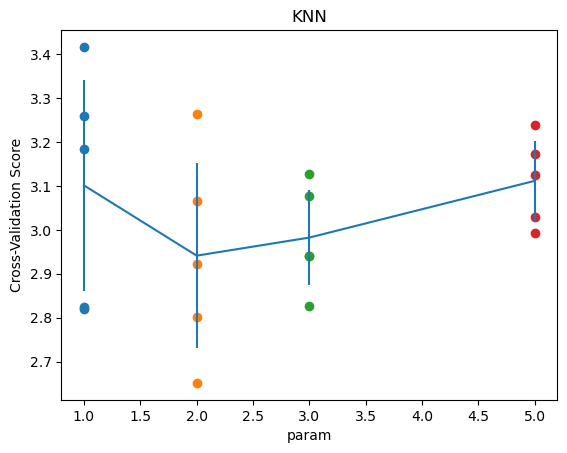

In [27]:
plot_validation_results(param_to_scores, 'KNN')

The method `plot_scores()` shows the training and validation scores for each parameter setting.

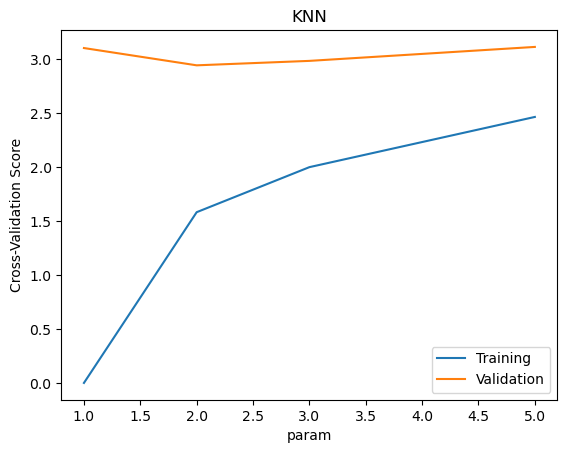

In [28]:
plot_scores(param_to_scores, 'KNN')

The code above for the k-fold cross-validation already contains the lines for the training of 4 different regressors:

* [`KNeighborsRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html) with `n_neighbors` as hyperparameter

* [`DecisionTreeRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) with `max_depth` as hyperparameter

* [`RandomForestRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) with `max_depth` as hyperparameter

* [`GradientBoostingRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html) with `max_depth` as hyperparameter

We focus on these 4 models since we look at only one hyperparameter and consider only integer values. This `n_neighbors` (for KNN) and `max_depth` for the tree-based models are important hyperparameters (assume integer values).


#### 4.2 b) Run k-fold Cross Validation for 4 Regressors and Discuss the Results. (6 Points)¶

Based on the plots, 1) compare the methods in terms of validation performance, and explain your findings; 2) explain how the hyperparameters of each method relate to overfitting and underfitting. Hint: Use the methods `plot_scores()` and `plot_validation_results` to visualize the results; save the 2 plots for each regressor as images so you can easily compare them side by side (there's no need to submit the images later!)

**Your answer:**

<font color="blue">
    
### Plots
 
plot_validation_results() | plot_scores()
- | - 
<img src="images/KNN_validation.png" width="65%" height="65%"/> | <img src="images/KNN_training.png" width="65%" height="65%"/>
<img src="images/DT_validation.png" width="65%" height="65%"/> | <img src="images/DT_training.png" width="65%" height="65%"/>
<img src="images/RF_validation.png" width="65%" height="65%"/> | <img src="images/RF_training.png" width="65%" height="65%"/>
<img src="images/GB_validation.png" width="65%" height="65%"/> | <img src="images/GB_training.png" width="65%" height="65%"/>
        
</font>    

| Regressor | Validation Performance | Hyperparameter | Training Performance |
| ----------- | ----------- |  ----------- |  ----------- |
| KNeighborsRegressor | The error bars for each param are the longest amongst all regressors showing that the predicted values for each `num_fold` are more spread out and less reliable. The error bar starts getting smaller with increasing neighbours showing the decreasing uncertainty in predictions, however the mean validation score increases. This shows that the model has started to overfit. | n_neighbors | Since its a regression task, the predicted class is a mean of its nearest K neighbours. Therefore, with increasing number of neighbours, the training error increases linearly until it starts to become stable (its least for `K=1` since it chooses itself as the nearest neighbor, however the validation score is high since the model has underfit currently). Validation error also starts to converge with increasing K. However, by increasing K beyond a certain threshold, the model would begin to overfit and the scores would start to diverge.|
| DecisionTreeRegressor | The mean validation score decreases with increasing `max_depth` as the tree is able to learn more features of the data. The values for every fold and param are mostly concentrated and thus reliable as tree-based regressors predict values based on intelligent splits. | max_depth | Both, the validation and training errors decrease with increasing depth of the DT. This is because the tree is able to learn more features of the data and predict better regression values with increasing depth. However, the DT starts to overfit at `max_depth=3` and the scores start to diverge. |
| RandomForestRegressor | The trend is similar to DTs. However, the values are spread out for `max_depth=1` where the model is underfitting, and extremely concentrated at `max_depth=5`. Moreover, the mean validation scores are better than DT. This is expected as RF average out the decisions of several DTs and reduce overall variance thereby making it more generalized to unseen data. | max_depth | Both, the validation and training errors decrease with increasing depth of the RF. This is because the trees are able to learn more features of the data and predict better regression values with increasing depth. However, the RF starts to overfit at `max_depth=3` and the scores start to diverge. Even then, it performs better than DT as expected as the scores are lesser at every depth.|
| GradientBoostingRegressor | The values are spread out for all params showing increased uncertainty of predictions as compared to DT and RF. Even though the mean validation score is lesser than DT and RF, the unreliability of predictions for every fold is high. Perhaps, more hyperparameter tuning is required for it to give certain results for every fold. | max_depth | The training score is almost 0 with `max_depth=5`, however the validation score starts to diverge from `max_depth=3`. Therefore, the model has overfit grossly. I feel that at `max_depth=2 or 3`, the model is generalized enough without being underfit. Moreover, GB has the lowest scores compared to all other regressors. |

### 4.3 Hyperparameter Tuning (3 Points)

The results of the different models in off-the-shelf implementations vary quite a bit, but of course, we used the only default parameters of each implementation which might or might not be good for our dataset and task. In practice, you would perform hyperparameter tuning for all or at least most models. However, this is unnecessarily since the tuning process is very similar for each model. So we do it only for one model: **GradientBoostingRegressor**, which is very similar to the boosting approach discussed in lecture.

**Important hints:**

* Use [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)! It automatically performs k-fold cross-validation (by default: k=5, which is fine) for all specified combinations of hyperparameter values. With [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html), finding the best model (i.e., the model with the best hyperparameter models) should only require only very few lines of code!
* For all other arguments of [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) (other than the model and the parameter grid), you can use the defaults.
* [`GradientBoostingRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html) provides a whole range of hyperparameters. Pick **2-3 hyperparameters** to tune the model (any choice of hyperparameters and grid values is fine; feel free to pick them based on your preference).
* Setting a large grid (e.g. more than 10 parameter combinations) may cause `GridSearchCV` to run slowly.

In [29]:
%%time

model = None

#########################################################################################
### Your code starts here ###############################################################
parameters = {
    'learning_rate':[0.0001, 0.001, 0.01, 0.1],
    'n_estimators':[50, 100, 125, 200],
    'max_depth': [3, 4, 5]
}
model = GradientBoostingRegressor()
clf = GridSearchCV(model, parameters)
model = clf.fit(X_train, y_train)

### Your code ends here #################################################################
######################################################################################### 

# Store the parameters of the best model
best_params = model.best_params_

# Predict class labels of test data on the model with the best found parameters
y_pred = model.predict(X_test)

best_mse = mean_squared_error(y_test, y_pred, squared=False)

print('Best Gradient Boosting regressor: {} (RMSE: {:.3f})'.format(best_params, best_mse))

Best Gradient Boosting regressor: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200} (RMSE: 1.789)
CPU times: user 2min 39s, sys: 796 ms, total: 2min 40s
Wall time: 2min 42s
